In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Special methods in python

In [3]:
#special methods in python

a = 10.0
b = 20.0
c = -10.0

a.__add__(b)  # This is equivalent to a + b
a.__sub__(b)  # This is equivalent to a - b
# a*b +c

d = (a.__mul__(b)).__add__(c)  # This is equivalent to a * b + c
print('d = a * b + c = {} * {} + {} = {}'.format(a, b, c, d))

d = a * b + c = 10.0 * 20.0 + -10.0 = 190.0


### Value Object

In [ ]:
## Note: did not understood the children thing
## _prev is a set of tuples that take part in an operation
## children is of type tuple that contains the operands of the operation
## _prev is a set keeps children 

class Value:
    def __init__(self, data, op = '', children = (), label = None):
        self.data = data
        self._op = op
        self._prev = set(children)
        self.label = label
        self.grad = 0.0
    # __repr__ is a special method that defines how the object is represented as a string
    # when you call print on the object or use it in a string context
    def __repr__(self):
        return f"Value(data: {self.data})" 

    # method to add two Value objects
    # this method is called when you use the + operator on two Value objects
    def __add__(self, other):
        out = Value(self.data + other.data, op = '+', children = (self, other))
        return out

    # method to multiply two Value objects
    # this method is called when you use the * operator on two Value objects
    def __mul__(self, other):
        out = Value(self.data * other.data, op = '*', children = (self, other))
        return out
    
    def tanh(self):
        value = self.data
        out = (math.exp(2 * value) - 1) / (math.exp(2 * value) + 1)
        return Value(out, op='tanh', children=(self,))

In [5]:
## adding two Value objects
a = Value(10.0, label='a')
b = Value(20.0, label='b')
x = a + b
x.label = 'x'  # Assigning a label to the result
print(x)  # This will call the __add__ method of the Value class
print(x._op) # This will print the operation performed, which is '+'
print(x._prev)  # This will print the previous values involved in the operation
print(x.label)  # This will print the label of the first operand

Value(data: 30.0)
+
{Value(data: 20.0), Value(data: 10.0)}
x


In [6]:
## multiplying two Value objects
c = Value(-10.0, label='c')
d = Value(5.0, label='d')
y = c * d
y.label = 'y'  # Assigning a label to the result
print(y)  # This will call the __mul__ method of the Value class
print(y._op)  # This will print the operation performed, which is '*'
print(y._prev)  # This will print the previous values involved in the operation

Value(data: -50.0)
*
{Value(data: 5.0), Value(data: -10.0)}


In [7]:
a = Value(10.0, label='a')
b = Value(20.0, label='b')
c = Value(-10.0, label='c')
d = a * b + c  # This will call the __mul__ and __add__ methods of the Value class
d.label = 'd'  # Assigning a label to the result

print(d)
print(a.__mul__(b).__add__(c))  # This is equivalent to a * b + c using special methods

Value(data: 190.0)
Value(data: 190.0)


In [8]:
d._op # This will give you the operation that was performed
print(f'd._op = {d._op}')  # This will print the operation that was performed

d._op = +


In [9]:
print(f'd._prev = {d._prev}')  # This will print the previous values involved in the operation
## plus operation took place between {Value(data: -10.0) = a*b, Value(data: 200.0)}

d._prev = {Value(data: -10.0), Value(data: 200.0)}


In [10]:
f = Value(5.0, label='f')
L = d * f
L.label = 'L'  # Assigning a label to the result of the multiplication
print(L)  # This will call the __mul__ method of the Value class
print(L._op)  # This will print the operation performed, which is '*'
print(L._prev)  # This will print the previous values involved in the operation

Value(data: 950.0)
*
{Value(data: 5.0), Value(data: 190.0)}


In [11]:
from graphviz import Digraph

In [12]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s |data: %.4f| grad: %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [13]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
d = a*b; d.label = 'd'  # d = a * b
e = d + c; e.label = 'e'  # e = d + c
f = Value(-2.0, label='f')
L = e * f; L.label = 'L'  # L = e * f

In [ ]:
## setting gradients manually
## manual backpropagation
L.grad = 1.0  
e.grad = f.data #dL / de = f = -2
f.grad = e.data #dL / df = e = 4
d.grad = e.grad * 1 ## dL/dd = dL/de * de/dd = -2 * 1 = -2
c.grad = e.grad * 1 ## dL/dc = dL/de * de/dc = -2 * 1 = -2
b.grad = d.grad * a.data  # dL/db = dL/dd * dd/db = -2 * 2 = -4
a.grad = d.grad * b.data  # dL/da = dL/dd * dd/da = -2 * -3 = 6

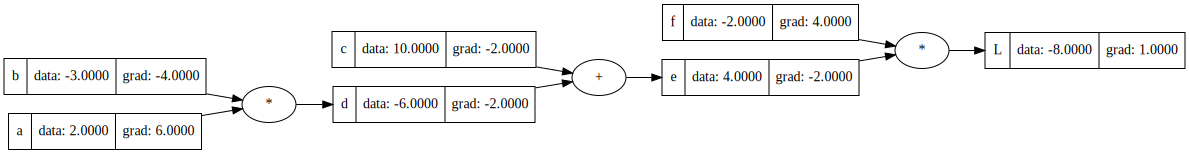

In [24]:
# Setting the gradient of L to 1.0 for backpropagation
draw_dot(L)

In [22]:
def grad():
    ## grad of L wrt to a is how much L changes when a changes by a small amount h
    ## L changed when a changed by h - L earlier / h
    h = 0.001  # A small value for numerical gradient approximation
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    d = a*b; d.label = 'd'  # d = a * b
    e = d + c; e.label = 'e'  # e = d + c
    f = Value(-2.0, label='f')
    L = e * f; L.label = 'L'  # L = e * f
    L1 = L.data  # Store the initial value of L

    ## adding h to a
    a = Value(2.0, label='a_h')
    b = Value(-3.0 + h, label='b')
    c = Value(10.0 , label='c')
    d = (a*b); d.label = 'd'  # d = a * b
    #d.data += h  # Incrementing d by h
    e = d + c; e.label = 'e'  # e = d + c
    f = Value(-2.0 , label='f')
    L = e * f; L.label = 'L'  # L = e * f
    L2 = L.data   # Store the initial value of L
    grad_a = (L2 - L1) / h  # Numerical gradient approximation for a
    print(f'grad_a = {grad_a}')  # This will print the numerical gradient of L with respect to a

grad()
    

grad_a = -3.9999999999995595


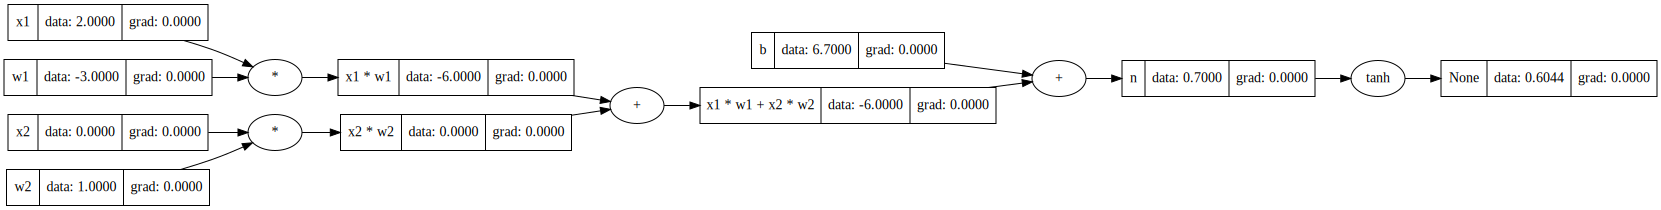

In [29]:
### single neuron example

x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.7, label='b')  # Bias term

x1w1 = x1 * w1  # Multiply x1 and w1
x1w1.label = 'x1 * w1'  # Assigning a label to the result of the multiplication
x2w2 = x2 * w2  # Multiply x2 and w2
x2w2.label = 'x2 * w2'  # Assigning a label to the result of the multiplication
x1w1x2w2 = x1w1 + x2w2  # Add the results of the multiplications
x1w1x2w2.label = 'x1 * w1 + x2 * w2'  # Assigning a label to the result of the addition

n = x1w1x2w2 + b  # Add the bias term
n.label = 'n'  # Assigning a label to the final output
L = n.tanh()  # Apply the tanh activation function

draw_dot(L)

In [45]:
def grad():

    h = 0.001  # Small value for numerical gradient approximation
    x1 = Value(2.0, label='x1')
    x2 = Value(0.0, label='x2')

    w1 = Value(-3.0, label='w1')
    w2 = Value(1.0, label='w2')

    b = Value(6.7, label='b')  # Bias term

    x1w1 = x1 * w1  # Multiply x1 and w1
    x1w1.label = 'x1 * w1'  # Assigning a label to the result of the multiplication
    x2w2 = x2 * w2  # Multiply x2 and w2
    x2w2.label = 'x2 * w2'  # Assigning a label to the result of the multiplication
    x1w1x2w2 = x1w1 + x2w2  # Add the results of the multiplications
    x1w1x2w2.label = 'x1 * w1 + x2 * w2'  # Assigning a label to the result of the addition

    n = x1w1x2w2 + b  # Add the bias term
    n.label = 'n'  # Assigning a label to the final output
    L = n.tanh()  # Apply the tanh activation function
    L1 = L.data
    #print(f"L1 = {L1}")  # Store the initial value of L

    x1 = Value(2.0, label='x1')
    x2 = Value(0.0, label='x2')

    w1 = Value(-3.0 + h, label='w1')
    w2 = Value(1.0, label='w2')

    b = Value(6.7 , label='b')  # Bias term

    x1w1 = x1 * w1  # Multiply x1 and w1
    x1w1.label = 'x1 * w1'  # Assigning a label to the result of the multiplication
    x2w2 = x2 * w2  # Multiply x2 and w2
    x2w2.label = 'x2 * w2'  # Assigning a label to the result of the multiplication
    x1w1x2w2 = x1w1 + x2w2   # Add the results of the multiplications
      # Incrementing x1w1x2w2 by h
    x1w1x2w2.label = 'x1 * w1 + x2 * w2'  # Assigning a label to the result of the addition

    n = x1w1x2w2 + b  # Add the bias term
     # Incrementing n by h
    n.label = 'n'  # Assigning a label to the final output
    L = n.tanh()  # Apply the tanh activation function
    L2 = L.data   # Incrementing L by h
    

    print(f"grad {(L2 - L1) / h} == {2.0 * (1 - (L1 ** 2))}")  # Numerical gradient approximation for L

grad()

grad 1.2679448793155856 == 1.2694791799649168
